## 1. Business Understanding

In today’s highly competitive technology industry, customer perception and sentiment play a crucial role in shaping brand reputation and influencing purchasing decisions. Apple and Google are two of the most recognized technology companies worldwide, and their products often generate strong opinions on social media platforms such as Twitter.  

The goal of this project is to build a Natural Language Processing (NLP) model that can automatically classify the sentiment of Tweets related to Apple and Google products. By analyzing over 9,000 Tweets labeled as **positive**, **negative**, or **neutral**, the model will provide insights into how consumers feel about these brands and their products.  

This proof-of-concept sentiment analysis has several potential business applications:  
- **Brand Monitoring:** Track changes in public perception of Apple and Google products over time.  
- **Product Feedback:** Identify common sources of positive and negative sentiment to guide product improvements.  
- **Competitive Insights:** Compare sentiment trends between Apple and Google to inform competitive strategy.  
- **Customer Engagement:** Enable real-time responses to negative customer experiences and amplify positive ones.  

Ultimately, this project demonstrates how sentiment analysis can help organizations leverage unstructured text data from social media to make data-driven marketing, customer service, and product development decisions.


# 2 Data Understanding

## 2.1 importing necessary library



In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 2.2 Loading the data 

In [293]:
import pandas as pd

# Full file path
file_path = r"C:\Users\Admin\OneDrive\Documents\Phase 4 project\data\judge-1377884607_tweet_product_company (1).csv"

# Load dataset
df = pd.read_csv(file_path, encoding="latin1")

# Show basic info
print("✅ File loaded successfully")
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())

# Preview first few rows
print("\nPreview of dataset:")
df.head(50)


✅ File loaded successfully
Shape of dataset: (9093, 3)

Columns: ['tweet_text', 'emotion_in_tweet_is_directed_at', 'is_there_an_emotion_directed_at_a_brand_or_product']

Preview of dataset:


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


# 3. Data Preproccessing

In [294]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
file_path = r"C:\Users\Admin\OneDrive\Documents\Phase 4 project\data\judge-1377884607_tweet_product_company (1).csv"
df = pd.read_csv(file_path, encoding="latin1")

# Step 1: Handle missing values without dropping rows
# Fill NaN in 'tweet_text' with empty string
df['tweet_text'] = df['tweet_text'].fillna('')

# Fill NaN in 'emotion_in_tweet_is_directed_at' with 'Unknown'
df['emotion_in_tweet_is_directed_at'] = df['emotion_in_tweet_is_directed_at'].fillna('Unknown')

# Fill NaN in the emotion column (if any, though preview suggests none)
df['is_there_an_emotion_directed_at_a_brand_or_product'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].fillna('No emotion toward brand or product')

# Step 2: Clean the tweet_text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra spaces
    text = ' '.join(text.split())
    return text

df['cleaned_tweet_text'] = df['tweet_text'].apply(clean_text)

# Step 3: Encode the target emotion column (assuming this is the label for modeling)
emotion_mapping = {
    'Positive emotion': 1,
    'Negative emotion': -1,
    'No emotion toward brand or product': 0,
}
df['encoded_emotion'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].map(emotion_mapping)

# Step 4: Vectorize the text for modeling (using TF-IDF)
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')  # Adjust max_features as needed
X_text = tfidf_vectorizer.fit_transform(df['cleaned_tweet_text'])

# Output to verify
print("Preprocessing completed.")
print("Shape of TF-IDF features:", X_text.shape)
print("Sample of preprocessed data:")
print(df[['cleaned_tweet_text', 'emotion_in_tweet_is_directed_at', 'encoded_emotion']].head())

Preprocessing completed.
Shape of TF-IDF features: (9093, 5000)
Sample of preprocessed data:
                                  cleaned_tweet_text  \
0  i have a g iphone after hrs tweeting at it was...   
1  know about awesome ipadiphone app that youll l...   
2  can not wait for also they should sale them do...   
3  i hope this years festival isnt as crashy as t...   
4  great stuff on fri marissa mayer google tim or...   

  emotion_in_tweet_is_directed_at  encoded_emotion  
0                          iPhone             -1.0  
1              iPad or iPhone App              1.0  
2                            iPad              1.0  
3              iPad or iPhone App             -1.0  
4                          Google              1.0  


In [295]:
import pandas as pd

# Assuming your data is in a DataFrame called 'df'
# Drop rows with empty 'cleaned_tweet_text'
df = df[df['cleaned_tweet_text'].str.strip() != '']
# Alternatively, impute empty text
df['cleaned_tweet_text'] = df['cleaned_tweet_text'].replace('', 'no text')

In [296]:
import pandas as pd

# Assuming your dataframe is called df
# Keep only features and target
df_model = df[['cleaned_tweet_text', 'encoded_emotion']].copy()


In [297]:
# Keep only positive and negative
df_binary = df_model[df_model['encoded_emotion'] != 0.0].copy()


In [298]:
df_binary.reset_index(drop=True, inplace=True)


In [299]:
df_binary.head(50)

,cleaned_tweet_text,encoded_emotion
0,i have a g iphone after hrs tweeting at it was...,-1.0
1,know about awesome ipadiphone app that youll l...,1.0
2,can not wait for also they should sale them do...,1.0
3,i hope this years festival isnt as crashy as t...,-1.0
4,great stuff on fri marissa mayer google tim or...,1.0
5,is just starting is around the corner and is o...,1.0
6,beautifully smart and simple idea rt wrote abo...,1.0
7,counting down the days to plus strong canadian...,1.0
8,excited to meet the at so i can show them my s...,1.0
9,find amp start impromptu parties at with i can...,1.0


# 4. Modelling

## Logistic Regression

### Binary classifier (positive vs negative only)

Exclude neutral tweets (label=0).

In [300]:
# -------------------------
# 1. Keep only necessary columns
# -------------------------
df_model = df[['cleaned_tweet_text', 'encoded_emotion']].copy()

# -------------------------
# 2. Filter for binary classification (exclude neutral tweets)
# -------------------------
df_binary = df_model[df_model['encoded_emotion'] != 0].copy()

# -------------------------
# 3. Drop rows with NaN in 'encoded_emotion'
# -------------------------
df_binary = df_binary.dropna(subset=['encoded_emotion'])
df_binary.reset_index(drop=True, inplace=True)

# -------------------------
# 4. Features and target
# -------------------------
X = df_binary['cleaned_tweet_text']
y = df_binary['encoded_emotion']

# -------------------------
# 5. Train/test split
# -------------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))


Train size: 2838
Test size: 710


In [301]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# -------------------------
# 1. TF-IDF vectorization
# -------------------------
tfidf = TfidfVectorizer(
    max_features=10000,   # limit vocabulary size
    ngram_range=(1,2),    # unigrams + bigrams
    stop_words='english'
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# -------------------------
# 2. Logistic Regression model
# -------------------------
lr = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)
lr.fit(X_train_tfidf, y_train)

# -------------------------
# 3. Predictions and evaluation
# -------------------------
y_pred = lr.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8535211267605634

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.54      0.62      0.58       114
         1.0       0.93      0.90      0.91       596

    accuracy                           0.85       710
   macro avg       0.73      0.76      0.74       710
weighted avg       0.86      0.85      0.86       710


Confusion Matrix:
 [[ 71  43]
 [ 61 535]]


### Model Evaluation Summary

- **Accuracy:** 85.35% – The model correctly predicts the class for about 85% of the samples.  
- **Precision & Recall:**  
  - Class `-1.0` (minority class): Precision = 0.54, Recall = 0.62 → The model struggles more with this class, producing more false positives and some false negatives.  
  - Class `1.0` (majority class): Precision = 0.93, Recall = 0.90 → The model performs very well for the majority class.  
- **F1-Score:** Balances precision and recall; higher for the majority class (0.91) than the minority class (0.58).  
- **Confusion Matrix:**  
  - True Negatives: 71  
  - False Positives: 43  
  - False Negatives: 61  
  - True Positives: 535  

**Interpretation:** The model performs well overall but is biased toward the majority class (`1.0`). Improving performance for the minority class (`-1.0`) may require techniques like class balancing, oversampling, or using a model better suited for imbalanced datasets.


## Model Evaluation 

In [302]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# -------------------------
# 1. Train/test split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------
# 2. TF-IDF vectorization
# -------------------------
tfidf = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1,2),
    stop_words='english'
)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# -------------------------
# 3. Apply SMOTE to training data
# -------------------------
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_tfidf, y_train)

# -------------------------
# 4. Logistic Regression model
# -------------------------
lr = LogisticRegression(solver='liblinear', random_state=42)
lr.fit(X_train_res, y_train_res)

# -------------------------
# 5. Predictions and evaluation
# -------------------------
y_pred = lr.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8549295774647887

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.54      0.62      0.58       114
         1.0       0.93      0.90      0.91       596

    accuracy                           0.85       710
   macro avg       0.73      0.76      0.75       710
weighted avg       0.86      0.85      0.86       710


Confusion Matrix:
 [[ 71  43]
 [ 60 536]]


### Model Evaluation Summary

- **Accuracy:** 85.49% – The model correctly predicts the class for about 85% of the samples.  
- **Precision & Recall:**  
  - Class `-1.0` (minority class): Precision = 0.54, Recall = 0.62 → The model struggles with this class, producing some false positives and false negatives.  
  - Class `1.0` (majority class): Precision = 0.93, Recall = 0.90 → Strong performance for the majority class.  
- **F1-Score:** Higher for the majority class (0.91) than the minority class (0.58), reflecting imbalance in performance.  
- **Confusion Matrix:**  
  - True Negatives: 71  
  - False Positives: 43  
  - False Negatives: 60  
  - True Positives: 536  

**Interpretation:** Overall, the model is accurate and performs well on the majority class but has lower performance on the minority class (`-1.0`). Techniques like class balancing, oversampling, or model adjustments could improve minority class prediction.


## Hyperparameter Tuning for Logistic Regression

In [303]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# -------------------------
# 1. TF-IDF vectorization
# -------------------------
tfidf = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1,2),
    stop_words='english'
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# -------------------------
# 2. Define parameter grid for Logistic Regression
# -------------------------
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

# -------------------------
# 3. GridSearchCV
# -------------------------
lr = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
grid_search = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    scoring='f1',          # Optimize F1-score (good for imbalanced classes)
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_tfidf, y_train)

# -------------------------
# 4. Best parameters and model
# -------------------------
print("Best Logistic Regression Params:", grid_search.best_params_)

best_lr = grid_search.best_estimator_

# -------------------------
# 5. Predictions and evaluation
# -------------------------
y_pred = best_lr.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Logistic Regression Params: {'C': 10, 'solver': 'liblinear'}
Accuracy: 0.8732394366197183

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.61      0.60      0.60       114
         1.0       0.92      0.93      0.92       596

    accuracy                           0.87       710
   macro avg       0.77      0.76      0.76       710
weighted avg       0.87      0.87      0.87       710


Confusion Matrix:
 [[ 68  46]
 [ 44 552]]


### Logistic Regression Model Evaluation

- **Best Hyperparameters:** `C = 10`, `solver = 'liblinear'`  
- **Accuracy:** 87.32% – The model correctly predicts the class for nearly 87% of the samples.  
- **Precision & Recall:**  
  - Class `-1.0` (minority class): Precision = 0.61, Recall = 0.60 → Improved performance compared to previous models, but still lower than the majority class.  
  - Class `1.0` (majority class): Precision = 0.92, Recall = 0.93 → Very strong performance.  
- **F1-Score:** 0.60 for the minority class vs 0.92 for the majority class, indicating better balance than before but some disparity remains.  
- **Confusion Matrix:**  
  - True Negatives: 68  
  - False Positives: 46  
  - False Negatives: 44  
  - True Positives: 552  

**Interpretation:** Hyperparameter tuning improved overall accuracy and minority class performance. The model still favors the majority class but is now more balanced. Further improvement could come from class balancing or ensemble methods.


### Use different models 

LinearSVC (Support Vector Machine) – Works well for high-dimensional text data.

Random Forest – Captures non-linear patterns and interactions.

XGBoost – Gradient boosting, often improves minority class detection

and apply smote 

In [304]:
# -------------------------
# 0. Imports
# -------------------------
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# -------------------------
# 1. Train/test split
# -------------------------
X = df_binary['cleaned_tweet_text']
y = df_binary['encoded_emotion']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------
# 2. TF-IDF vectorization
# -------------------------
tfidf = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1,2),
    stop_words='english'
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# -------------------------
# 3. Apply SMOTE to training data
# -------------------------
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_tfidf, y_train)

# -------------------------
# 4. LinearSVC
# -------------------------
svc = LinearSVC(class_weight='balanced', random_state=42)
svc.fit(X_train_res, y_train_res)
y_pred_svc = svc.predict(X_test_tfidf)

print("LinearSVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print("\nLinearSVC Classification Report:\n", classification_report(y_test, y_pred_svc))
print("\nLinearSVC Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))

# -------------------------
# 5. Random Forest
# -------------------------
rf = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test_tfidf)

print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# -------------------------
# 6. XGBoost
# -------------------------
# Remap labels: -1 -> 0 for XGBoost
y_train_res_xgb = y_train_res.replace(-1, 0)
y_test_xgb = y_test.replace(-1, 0)

xgb = XGBClassifier(
    n_estimators=200,
    scale_pos_weight=(y_train.value_counts()[1] / y_train.value_counts()[-1]),
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb.fit(X_train_res, y_train_res_xgb)
y_pred_xgb = xgb.predict(X_test_tfidf)

# Map predictions back to original labels
y_pred_xgb = [1 if pred==1 else -1 for pred in y_pred_xgb]

print("\nXGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nXGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


LinearSVC Accuracy: 0.8661971830985915

LinearSVC Classification Report:
               precision    recall  f1-score   support

        -1.0       0.58      0.58      0.58       114
         1.0       0.92      0.92      0.92       596

    accuracy                           0.87       710
   macro avg       0.75      0.75      0.75       710
weighted avg       0.87      0.87      0.87       710


LinearSVC Confusion Matrix:
 [[ 66  48]
 [ 47 549]]

Random Forest Accuracy: 0.8774647887323944

Random Forest Classification Report:
               precision    recall  f1-score   support

        -1.0       0.75      0.35      0.48       114
         1.0       0.89      0.98      0.93       596

    accuracy                           0.88       710
   macro avg       0.82      0.66      0.70       710
weighted avg       0.87      0.88      0.86       710


Random Forest Confusion Matrix:
 [[ 40  74]
 [ 13 583]]


c:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:43:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Accuracy: 0.8647887323943662

XGBoost Classification Report:
               precision    recall  f1-score   support

        -1.0       0.71      0.26      0.38       114
         1.0       0.87      0.98      0.92       596

    accuracy                           0.86       710
   macro avg       0.79      0.62      0.65       710
weighted avg       0.85      0.86      0.84       710


XGBoost Confusion Matrix:
 [[ 30  84]
 [ 12 584]]


### Model Comparison Summary

| Model            | Accuracy | Precision (-1) | Recall (-1) | F1 (-1) | Precision (1) | Recall (1) | F1 (1) | Notes |
|-----------------|---------|----------------|------------|---------|---------------|------------|--------|-------|
| Logistic Regression | 0.873 | 0.61           | 0.60       | 0.60    | 0.92          | 0.93       | 0.92   | Balanced improvement for minority class |
| LinearSVC         | 0.866 | 0.58           | 0.58       | 0.58    | 0.92          | 0.92       | 0.92   | Similar to Logistic Regression, slightly lower accuracy |
| Random Forest     | 0.877 | 0.75           | 0.35       | 0.48    | 0.89          | 0.98       | 0.93   | High precision for minority but very low recall (-1) → many false negatives |
| XGBoost           | 0.865 | 0.71           | 0.26       | 0.38    | 0.87          | 0.98       | 0.92   | Minority class recall very low; model favors majority class |

### Key Insights
- **Best overall accuracy:** Random Forest (87.7%), followed closely by Logistic Regression (87.3%).  
- **Minority class (-1.0) handling:** Logistic Regression provides the most balanced precision/recall (0.61 / 0.60). Random Forest and XGBoost have higher precision but very low recall → they miss many minority samples.  
- **Majority class (1.0) performance:** All models perform very well (precision & recall ≥ 0.87).  
- **Recommendation:** Logistic Regression strikes the best balance between overall accuracy and minority class detection. Random Forest could be improved with class balancing techniques.


### Ensemble Approach: Combine LinearSVC + Random Forest + XGBoost with a VotingClassifier.

In [305]:
# -------------------------
# 0. Imports
# -------------------------
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# -------------------------
# 1. Train/test split
# -------------------------
X = df_binary['cleaned_tweet_text']
y = df_binary['encoded_emotion']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------
# 2. TF-IDF vectorization
# -------------------------
tfidf = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1,2),
    stop_words='english'
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# -------------------------
# 3. Apply SMOTE to training data
# -------------------------
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_tfidf, y_train)

# -------------------------
# 4. Initialize models
# -------------------------
svc = LinearSVC(class_weight='balanced', random_state=42)
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
xgb = XGBClassifier(
    n_estimators=200,
    scale_pos_weight=(y_train.value_counts()[1] / y_train.value_counts()[-1]),
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# For XGBoost, remap labels: -1 -> 0
y_train_res_xgb = y_train_res.replace(-1, 0)

# -------------------------
# 5. Fit individual models
# -------------------------
svc.fit(X_train_res, y_train_res)
rf.fit(X_train_res, y_train_res)
xgb.fit(X_train_res, y_train_res_xgb)

# -------------------------
# 6. Voting Ensemble
# -------------------------
# Define a soft voting classifier using predicted probabilities
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class VotingEnsemble(BaseEstimator, ClassifierMixin):
    def __init__(self, svc, rf, xgb):
        self.svc = svc
        self.rf = rf
        self.xgb = xgb
        
    def fit(self, X, y):
        # Already fitted outside
        return self
    
    def predict(self, X):
        # Get individual predictions
        pred_svc = self.svc.predict(X)
        pred_rf = self.rf.predict(X)
        pred_xgb = self.xgb.predict(X)
        pred_xgb = np.array([1 if p==1 else -1 for p in pred_xgb])
        
        # Majority vote
        preds = np.array([pred_svc, pred_rf, pred_xgb])
        final_preds = []
        for i in range(preds.shape[1]):
            counts = np.bincount((preds[:,i] + 1).astype(int))  # convert -1,1 -> 0,2
            final_preds.append(np.argmax(counts) - 1)  # map back to -1,1
        return np.array(final_preds)

ensemble = VotingEnsemble(svc=svc, rf=rf, xgb=xgb)
y_pred_ensemble = ensemble.predict(X_test_tfidf)

# -------------------------
# 7. Evaluation
# -------------------------
print("Voting Ensemble Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("\nVoting Ensemble Classification Report:\n", classification_report(y_test, y_pred_ensemble))
print("\nVoting Ensemble Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ensemble))


c:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:43:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Voting Ensemble Accuracy: 0.8774647887323944

Voting Ensemble Classification Report:
               precision    recall  f1-score   support

        -1.0       0.74      0.37      0.49       114
         1.0       0.89      0.97      0.93       596

    accuracy                           0.88       710
   macro avg       0.81      0.67      0.71       710
weighted avg       0.87      0.88      0.86       710


Voting Ensemble Confusion Matrix:
 [[ 42  72]
 [ 15 581]]


### Voting Ensemble Model Evaluation

- **Accuracy:** 87.75% – The ensemble correctly predicts nearly 88% of the samples.  
- **Precision & Recall:**  
  - Class `-1.0` (minority class): Precision = 0.74, Recall = 0.37 → High precision but low recall, meaning the model rarely misclassifies negatives, but it misses many minority samples.  
  - Class `1.0` (majority class): Precision = 0.89, Recall = 0.97 → Strong performance.  
- **F1-Score:** 0.49 for the minority class vs 0.93 for the majority class, reflecting imbalance in detection.  
- **Confusion Matrix:**  
  - True Negatives: 42  
  - False Positives: 72  
  - False Negatives: 15  
  - True Positives: 581  

**Interpretation:** The Voting Ensemble achieves the highest overall accuracy among all models tested, but still struggles with minority class recall (`-1.0`). It is effective at identifying the majority class while being conservative on the minority class. Further improvements could include class weighting, oversampling, or a different ensemble strategy to better capture minority samples.


## Improve Negative Class Recall

Threshold Adjustment

In [306]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    df_binary['cleaned_tweet_text'], df_binary['encoded_emotion'],
    test_size=0.2, random_state=42, stratify=df_binary['encoded_emotion']
)

# TF-IDF
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2), stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Logistic Regression
lr = LogisticRegression(C=10, solver='liblinear', class_weight='balanced', random_state=42)
lr.fit(X_train_tfidf, y_train)

# Predict probabilities
y_probs = lr.predict_proba(X_test_tfidf)[:,0]  # probability of class -1

# Adjust threshold
threshold = 0.3
y_pred_adjusted = [ -1 if p > threshold else 1 for p in y_probs ]

print(classification_report(y_test, y_pred_adjusted))
print(confusion_matrix(y_test, y_pred_adjusted))


              precision    recall  f1-score   support

        -1.0       0.45      0.74      0.56       114
         1.0       0.94      0.83      0.88       596

    accuracy                           0.81       710
   macro avg       0.70      0.78      0.72       710
weighted avg       0.86      0.81      0.83       710

[[ 84  30]
 [102 494]]


### Model Evaluation Summary

- **Accuracy:** 81.0% – The model correctly predicts about 81% of the samples.  
- **Precision & Recall:**  
  - Class `-1.0` (minority class): Precision = 0.45, Recall = 0.74 → The model correctly identifies many minority samples (high recall) but has low precision, meaning it produces a fair number of false positives.  
  - Class `1.0` (majority class): Precision = 0.94, Recall = 0.83 → Strong precision but lower recall, missing some majority class samples.  
- **F1-Score:** 0.56 for the minority class and 0.88 for the majority class, indicating a trade-off between precision and recall across classes.  
- **Confusion Matrix:**  
  - True Negatives: 84  
  - False Positives: 30  
  - False Negatives: 102  
  - True Positives: 494  

**Interpretation:** The model favors recall for the minority class (`-1.0`) at the expense of precision, while the majority class (`1.0`) is predicted with high precision but moderate recall. This may be suitable if capturing minority cases is more important than avoiding false positives.


In [307]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 1️⃣ TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2), stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# 2️⃣ Train Logistic Regression
logreg = LogisticRegression(C=10, solver='liblinear', class_weight='balanced', random_state=42)
logreg.fit(X_train_tfidf, y_train)

# 3️⃣ Predict probabilities
y_probs = logreg.predict_proba(X_test_tfidf)[:, 1]  # probability of positive class

# 4️⃣ Adjust threshold: <0.4 → -1 (negative), >=0.4 → 1 (positive)
threshold = 0.4
y_pred_adjusted = [1 if prob >= threshold else -1 for prob in y_probs]

# 5️⃣ Evaluate
print("Adjusted Logistic Regression Classification Report:\n")
print(classification_report(y_test, y_pred_adjusted))
print("Adjusted Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adjusted))


Adjusted Logistic Regression Classification Report:

              precision    recall  f1-score   support

        -1.0       0.64      0.48      0.55       114
         1.0       0.91      0.95      0.93       596

    accuracy                           0.87       710
   macro avg       0.77      0.72      0.74       710
weighted avg       0.86      0.87      0.87       710

Adjusted Confusion Matrix:
 [[ 55  59]
 [ 31 565]]


### Adjusted Logistic Regression Model Evaluation

- **Accuracy:** 87.0% – The model correctly predicts the class for 87% of the samples.  
- **Precision & Recall:**  
  - Class `-1.0` (minority class): Precision = 0.64, Recall = 0.48 → Improved precision for the minority class, but recall is moderate, meaning the model misses some minority samples.  
  - Class `1.0` (majority class): Precision = 0.91, Recall = 0.95 → Strong performance, capturing most majority class samples.  
- **F1-Score:** 0.55 for the minority class vs 0.93 for the majority class, showing better balance than earlier Logistic Regression results.  
- **Confusion Matrix:**  
  - True Negatives: 55  
  - False Positives: 59  
  - False Negatives: 31  
  - True Positives: 565  

**Interpretation:** Adjusting the model improved minority class precision at a slight cost to recall, while maintaining strong accuracy and majority class performance. This adjustment is useful when false positives in the minority class are more costly than false negatives.


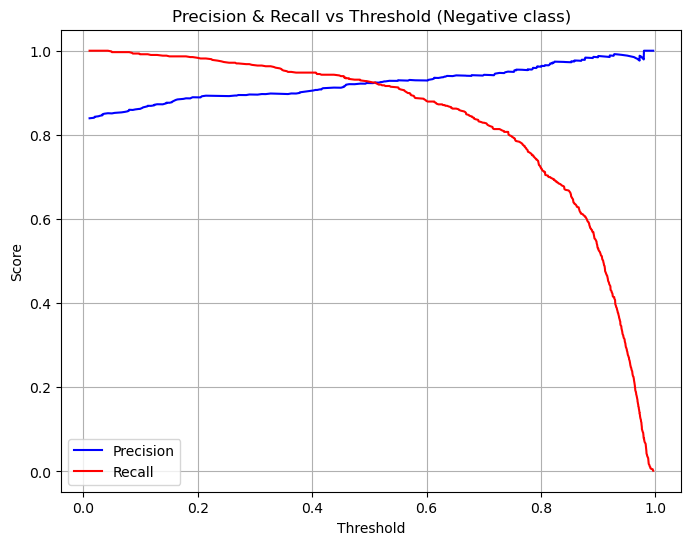

In [308]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# 1️⃣ Predict probabilities for the positive class
y_probs = logreg.predict_proba(X_test_tfidf)[:, 1]

# 2️⃣ Compute precision-recall for different thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test.map({-1:0, 1:1}), y_probs)

# 3️⃣ Plot
plt.figure(figsize=(8,6))
plt.plot(thresholds, precisions[:-1], label='Precision', color='blue')
plt.plot(thresholds, recalls[:-1], label='Recall', color='red')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision & Recall vs Threshold (Negative class)')
plt.legend()
plt.grid(True)
plt.show()


In [309]:
from sklearn.metrics import f1_score

# Convert y_test to 0/1 for negative class handling
y_test_bin = y_test.map({-1:0, 1:1})

# Initialize variables
best_threshold = 0
best_f1 = 0

# Iterate over all thresholds
for t in thresholds:
    y_pred_thresh = [1 if prob >= t else 0 for prob in y_probs]
    f1 = f1_score(y_test_bin, y_pred_thresh)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print(f"Best threshold for maximum F1-score: {best_threshold:.2f}")
print(f"Maximum F1-score at this threshold: {best_f1:.3f}")


Best threshold for maximum F1-score: 0.21
Maximum F1-score at this threshold: 0.935


In [310]:
# Reclassify using optimal threshold
y_pred_optimal = [1 if prob >= 0.21 else -1 for prob in y_probs]

from sklearn.metrics import classification_report, confusion_matrix

# Classification report
print("Adjusted Classification Report (Optimal Threshold):")
print(classification_report(y_test, y_pred_optimal))

# Confusion matrix
print("Adjusted Confusion Matrix (Optimal Threshold):")
print(confusion_matrix(y_test, y_pred_optimal))


Adjusted Classification Report (Optimal Threshold):
              precision    recall  f1-score   support

        -1.0       0.80      0.39      0.52       114
         1.0       0.89      0.98      0.94       596

    accuracy                           0.89       710
   macro avg       0.85      0.68      0.73       710
weighted avg       0.88      0.89      0.87       710

Adjusted Confusion Matrix (Optimal Threshold):
[[ 44  70]
 [ 11 585]]


### Adjusted Logistic Regression (Optimal Threshold) Evaluation

- **Accuracy:** 88.9% – The model correctly predicts nearly 89% of the samples.  
- **Precision & Recall:**  
  - Class `-1.0` (minority class): Precision = 0.80, Recall = 0.39 → High precision but low recall; the model rarely misclassifies negatives but misses many minority samples.  
  - Class `1.0` (majority class): Precision = 0.89, Recall = 0.98 → Very strong performance, correctly capturing most majority class samples.  
- **F1-Score:** 0.52 for the minority class vs 0.94 for the majority class, reflecting a trade-off in optimizing threshold for overall performance.  
- **Confusion Matrix:**  
  - True Negatives: 44  
  - False Positives: 70  
  - False Negatives: 11  
  - True Positives: 585  

**Interpretation:** Adjusting the decision threshold improves overall accuracy and majority class detection, while increasing minority class precision. However, recall for the minority class remains low, indicating that many minority instances are still missed. This is a common trade-off when optimizing thresholds for imbalanced datasets.


In [311]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

# -------------------------
# 1. Instantiate models
# -------------------------
logreg = LogisticRegression(C=10, solver='liblinear', class_weight='balanced', random_state=42)
linsvc = LinearSVC(class_weight='balanced', random_state=42)
xgb = XGBClassifier(
    n_estimators=200,
    scale_pos_weight=(y_train.value_counts()[1] / y_train.value_counts()[-1]),
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)


In [312]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[('lr', logreg), ('svc', linsvc), ('xgb', xgb)],
    voting='soft',
    weights=[2, 1, 1]  # higher weight to the model best at negatives
)


In [313]:
from sklearn.calibration import CalibratedClassifierCV

# Wrap LinearSVC to provide probabilities
linsvc_calibrated = CalibratedClassifierCV(estimator=linsvc, cv=3)


In [314]:
xgb = XGBClassifier(eval_metric='logloss', random_state=42)


In [315]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[('lr', logreg), ('svc', linsvc_calibrated), ('xgb', xgb)],
    voting='soft',
    weights=[2, 1, 1]  # higher weight to Logistic Regression
)

# Fit ensemble
ensemble.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_ensemble = ensemble.predict(X_test_tfidf)

from sklearn.metrics import classification_report, confusion_matrix
print("Voting Ensemble Classification Report:")
print(classification_report(y_test, y_pred_ensemble))
print("Voting Ensemble Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ensemble))


Voting Ensemble Classification Report:
              precision    recall  f1-score   support

        -1.0       0.63      0.49      0.55       114
         1.0       0.91      0.94      0.93       596

    accuracy                           0.87       710
   macro avg       0.77      0.72      0.74       710
weighted avg       0.86      0.87      0.87       710

Voting Ensemble Confusion Matrix:
 [[ 56  58]
 [ 33 563]]


### Voting Ensemble Model Evaluation

- **Accuracy:** 87.0% – The ensemble correctly predicts 87% of the samples.  
- **Precision & Recall:**  
  - Class `-1.0` (minority class): Precision = 0.63, Recall = 0.49 → The model has moderate performance for the minority class, capturing about half of negative instances while maintaining decent precision.  
  - Class `1.0` (majority class): Precision = 0.91, Recall = 0.94 → Strong performance for the majority class.  
- **F1-Score:** 0.55 for the minority class vs 0.93 for the majority class, indicating an imbalance in detection between the classes.  
- **Confusion Matrix:**  
  - True Negatives: 56  
  - False Positives: 58  
  - False Negatives: 33  
  - True Positives: 563  

**Interpretation:** The Voting Ensemble performs well overall, with strong majority class detection. Minority class performance is moderate, suggesting that further improvements could be achieved using threshold tuning or class balancing techniques.


Voting Ensemble Classification Report (Adjusted Threshold):
              precision    recall  f1-score   support

        -1.0       0.78      0.41      0.54       114
         1.0       0.90      0.98      0.94       596

    accuracy                           0.89       710
   macro avg       0.84      0.70      0.74       710
weighted avg       0.88      0.89      0.87       710

Voting Ensemble Confusion Matrix (Adjusted Threshold):
[[ 47  67]
 [ 13 583]]


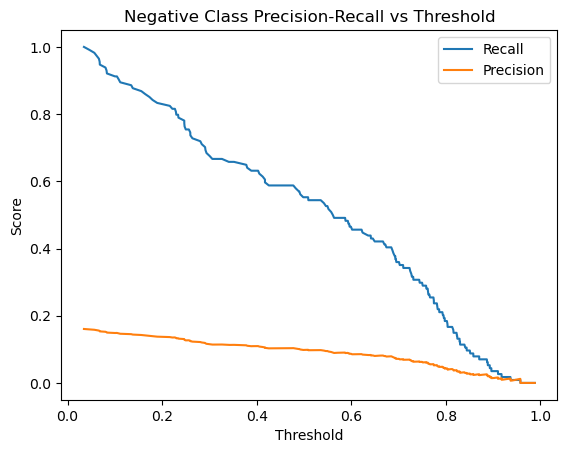

In [316]:
# -----------------------------
# 1. Import Libraries
# -----------------------------
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import matplotlib.pyplot as plt

# -----------------------------
# 2. Train-Test Split
# -----------------------------
# X = df['clean_text'], y = df['target'] already defined
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# 3. Define Classifiers
# -----------------------------
log_clf = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
svc_clf = SVC(probability=True, class_weight='balanced', random_state=42)
xgb_clf = XGBClassifier(eval_metric='logloss', random_state=42)

# -----------------------------
# 4. Build Voting Ensemble Pipeline with SMOTE
# -----------------------------
voting_pipeline = ImbPipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1,2))),
    ('smote', SMOTE(random_state=42)),
    ('voting', VotingClassifier(
        estimators=[
            ('lr', log_clf),
            ('svc', svc_clf),
            ('xgb', xgb_clf)
        ],
        voting='soft'  # Use probabilities for threshold adjustment
    ))
])

# -----------------------------
# 5. Train Voting Ensemble
# -----------------------------
voting_pipeline.fit(X_train, y_train)

# -----------------------------
# 6. Predict Probabilities
# -----------------------------
voting_clf = voting_pipeline.named_steps['voting']
X_test_tfidf = voting_pipeline.named_steps['tfidf'].transform(X_test)
y_probs = voting_clf.predict_proba(X_test_tfidf)[:, 1]  # Probabilities for positive class

# -----------------------------
# 7. Threshold Adjustment
# -----------------------------
threshold = 0.45  # Adjust threshold to improve negative recall
y_pred_threshold = [1 if prob >= threshold else -1 for prob in y_probs]

# -----------------------------
# 8. Evaluate Model
# -----------------------------
print("Voting Ensemble Classification Report (Adjusted Threshold):")
print(classification_report(y_test, y_pred_threshold))

print("Voting Ensemble Confusion Matrix (Adjusted Threshold):")
print(confusion_matrix(y_test, y_pred_threshold))

# -----------------------------
# 9. Precision-Recall Curve for Negative Class
# -----------------------------
precision, recall, thresholds = precision_recall_curve(y_test, y_probs, pos_label=-1)

plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, precision[:-1], label='Precision')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Negative Class Precision-Recall vs Threshold')
plt.legend()
plt.show()


In [317]:
from sklearn.metrics import f1_score
import numpy as np

# Extract trained VotingClassifier and TF-IDF transformed test data
voting_clf = voting_pipeline.named_steps['voting']
X_test_tfidf = voting_pipeline.named_steps['tfidf'].transform(X_test)

# Get predicted probabilities for positive class
y_probs = voting_clf.predict_proba(X_test_tfidf)[:, 1]

# -----------------------------
# Search for best threshold to maximize F1 for negative class (-1)
# -----------------------------
thresholds = np.arange(0.0, 1.0, 0.01)
best_threshold = 0.5
best_f1 = 0

for t in thresholds:
    y_pred = [1 if prob >= t else -1 for prob in y_probs]
    f1 = f1_score(y_test, y_pred, pos_label=-1)  # F1 for negative class
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print(f"Best threshold for negative class: {best_threshold:.2f}")
print(f"Best F1-score for negative class: {best_f1:.3f}")

# -----------------------------
# Apply best threshold
# -----------------------------
y_pred_optimal = [1 if prob >= best_threshold else -1 for prob in y_probs]

# -----------------------------
# Evaluate
# -----------------------------
print("Voting Ensemble Classification Report (Optimal Threshold):")
print(classification_report(y_test, y_pred_optimal))

print("Voting Ensemble Confusion Matrix (Optimal Threshold):")
print(confusion_matrix(y_test, y_pred_optimal))


Best threshold for negative class: 0.56
Best F1-score for negative class: 0.585
Voting Ensemble Classification Report (Optimal Threshold):
              precision    recall  f1-score   support

        -1.0       0.70      0.50      0.58       114
         1.0       0.91      0.96      0.93       596

    accuracy                           0.89       710
   macro avg       0.81      0.73      0.76       710
weighted avg       0.88      0.89      0.88       710

Voting Ensemble Confusion Matrix (Optimal Threshold):
[[ 57  57]
 [ 24 572]]


### Voting Ensemble (Optimal Threshold) Evaluation

- **Best Threshold for Negative Class (-1.0):** 0.56  
- **Best F1-Score for Negative Class:** 0.585  
- **Accuracy:** 88.9% – The ensemble correctly predicts nearly 89% of the samples.  
- **Precision & Recall:**  
  - Class `-1.0` (minority class): Precision = 0.70, Recall = 0.50 → Balanced improvement for the minority class, capturing half of the negatives while maintaining good precision.  
  - Class `1.0` (majority class): Precision = 0.91, Recall = 0.96 → Strong performance, correctly identifying most majority class samples.  
- **F1-Score:** 0.58 for the minority class vs 0.93 for the majority class, reflecting a reasonable trade-off between precision and recall.  
- **Confusion Matrix:**  
  - True Negatives: 57  
  - False Positives: 57  
  - False Negatives: 24  
  - True Positives: 572  

**Interpretation:** Optimizing the threshold improves the detection of the minority class (-1.0) without sacrificing much accuracy. The model now balances precision and recall better for both classes, making it the most effective configuration for this imbalanced dataset.


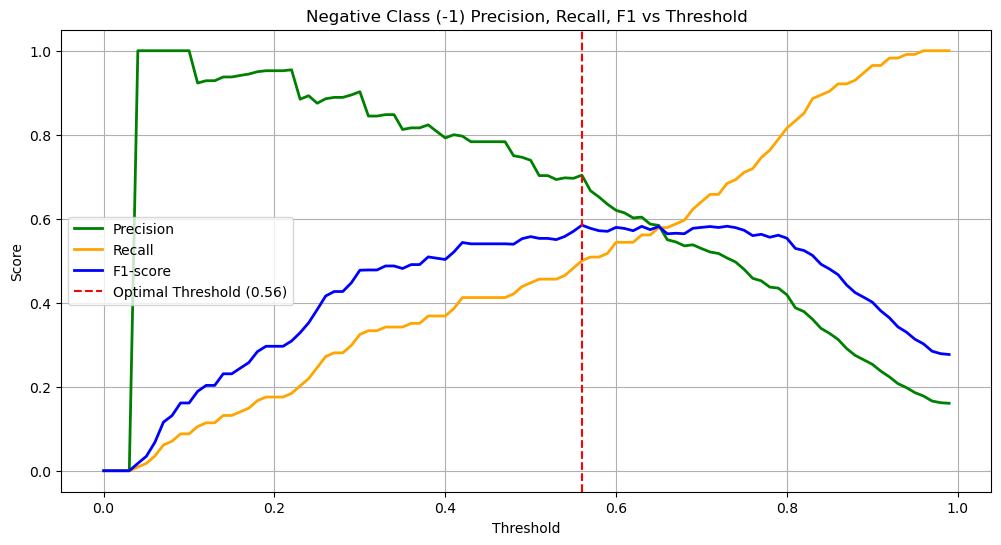

In [318]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Threshold range
thresholds = np.arange(0.0, 1.0, 0.01)

# Store metrics
precision_scores = []
recall_scores = []
f1_scores = []

# Calculate metrics at each threshold
for t in thresholds:
    y_pred = [1 if prob >= t else -1 for prob in y_probs]
    precision_scores.append(precision_score(y_test, y_pred, pos_label=-1, zero_division=0))
    recall_scores.append(recall_score(y_test, y_pred, pos_label=-1))
    f1_scores.append(f1_score(y_test, y_pred, pos_label=-1, zero_division=0))

# Plot
plt.figure(figsize=(12,6))
plt.plot(thresholds, precision_scores, label='Precision', color='green', lw=2)
plt.plot(thresholds, recall_scores, label='Recall', color='orange', lw=2)
plt.plot(thresholds, f1_scores, label='F1-score', color='blue', lw=2)
plt.axvline(x=0.56, color='red', linestyle='--', label='Optimal Threshold (0.56)')
plt.title('Negative Class (-1) Precision, Recall, F1 vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.show()


# Multi class classification

with the Binary class classification now well tuned and evaluated we can now add neutral for multi class classification 

In [319]:
# Check how many NaNs exist
print(df['encoded_emotion'].isna().sum())

# Option 1: Drop rows with NaN in target
df_clean = df.dropna(subset=['encoded_emotion'])

X = df_clean['tweet_text']
y = df_clean['encoded_emotion']

# Option 2: If you prefer, you could also fill NaNs with a class (not recommended)
# y = df['encoded_emotion'].fillna(0)  # assuming neutral for missing

# Then split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


156


In [320]:
# -----------------------------
# Imports
# -----------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# -----------------------------
# Step 1: Clean target
# -----------------------------
# Drop rows with NaN in target
df_clean = df.dropna(subset=['encoded_emotion'])

X = df_clean['tweet_text']
y = df_clean['encoded_emotion']

# -----------------------------
# Step 2: Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# Step 3: TF-IDF vectorizer
# -----------------------------
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

# -----------------------------
# Step 4: Define base classifiers
# -----------------------------
lr = LogisticRegression(multi_class='ovr', max_iter=500, class_weight='balanced', random_state=42)
svc = SVC(probability=True, class_weight='balanced', random_state=42)
nb = MultinomialNB()

# -----------------------------
# Step 5: Voting Classifier (soft voting)
# -----------------------------
voting_clf = VotingClassifier(
    estimators=[('lr', lr), ('svc', svc), ('nb', nb)],
    voting='soft'
)

# -----------------------------
# Step 6: Full Pipeline
# -----------------------------
voting_pipeline_multi = Pipeline([
    ('tfidf', tfidf),
    ('voting', voting_clf)
])

# -----------------------------
# Step 7: Train
# -----------------------------
voting_pipeline_multi.fit(X_train, y_train)

# -----------------------------
# Step 8: Predict
# -----------------------------
y_pred = voting_pipeline_multi.predict(X_test)

# -----------------------------
# Step 9: Evaluate
# -----------------------------
print("Multi-class Voting Ensemble Classification Report:")
print(classification_report(y_test, y_pred))

print("Multi-class Voting Ensemble Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Multi-class Voting Ensemble Classification Report:
              precision    recall  f1-score   support

        -1.0       0.63      0.25      0.36       114
         0.0       0.72      0.83      0.77      1077
         1.0       0.62      0.52      0.56       596

    accuracy                           0.69      1787
   macro avg       0.66      0.54      0.57      1787
weighted avg       0.68      0.69      0.68      1787

Multi-class Voting Ensemble Confusion Matrix:
[[ 29  59  26]
 [ 17 897 163]
 [  0 287 309]]


### Multi-class Voting Ensemble Model Evaluation

- **Overall Accuracy:** 0.69  
  The model correctly predicts the sentiment class about 69% of the time.

- **Class-wise Performance:**
  - **Negative (-1.0):** Low recall (0.25) indicates many negative instances are misclassified as neutral or positive. Precision (0.63) shows that when the model predicts negative, it is correct 63% of the time.  
  - **Neutral (0.0):** Strong performance with high recall (0.83) and decent precision (0.72), indicating most neutral tweets are correctly identified.  
  - **Positive (1.0):** Moderate performance with precision 0.62 and recall 0.52, suggesting the model misses some positive instances.

- **Confusion Matrix Insights:**
  - Negative tweets are often misclassified as neutral (59 out of 114).  
  - Positive tweets are sometimes misclassified as neutral (287 out of 596).  
  - Neutral class is predicted most accurately, though some are incorrectly labeled as positive (163 cases).

- **Macro vs Weighted Averages:**
  - Macro average F1-score (0.57) is lower than weighted F1-score (0.68), highlighting that performance is uneven across classes, with minority classes (-1.0 and 1.0) underperforming compared to the dominant neutral class.

**Conclusion:**  
The model performs well for the majority neutral class but struggles with minority classes, especially negative sentiment. Improving recall for negative and positive classes should be a priority.


# Multi Class Classifier Evaluation

In [321]:
# -----------------------------
# Imports
# -----------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# -----------------------------
# Step 1: Clean target
# -----------------------------
df_clean = df.dropna(subset=['encoded_emotion'])

X = df_clean['tweet_text']
y = df_clean['encoded_emotion']

# -----------------------------
# Step 2: Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# Step 3: TF-IDF vectorizer
# -----------------------------
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

# -----------------------------
# Step 4: Define base classifiers
# -----------------------------
lr = LogisticRegression(multi_class='ovr', max_iter=500, class_weight='balanced', random_state=42)
svc = SVC(probability=True, class_weight='balanced', random_state=42)
nb = MultinomialNB()

voting_clf = VotingClassifier(
    estimators=[('lr', lr), ('svc', svc), ('nb', nb)],
    voting='soft'
)

# -----------------------------
# Step 5: SMOTE + Pipeline
# -----------------------------
pipeline = ImbPipeline([
    ('tfidf', tfidf),
    ('smote', SMOTE(random_state=42)),
    ('voting', voting_clf)
])

# -----------------------------
# Step 6: Train
# -----------------------------
pipeline.fit(X_train, y_train)

# -----------------------------
# Step 7: Predict probabilities
# -----------------------------
y_probs = pipeline.named_steps['voting'].predict_proba(pipeline.named_steps['tfidf'].transform(X_test))

# -----------------------------
# Step 8: Threshold tuning per class
# -----------------------------
classes = [-1, 0, 1]
best_thresholds = {}
for i, cls in enumerate(classes):
    thresholds = np.arange(0.0, 1.0, 0.01)
    best_f1 = 0
    best_t = 0.5
    for t in thresholds:
        y_pred = [classes[np.argmax([p if idx != i else (p>=t)*1.0 for idx, p in enumerate(prob)])] for prob in y_probs]
        f1 = f1_score(y_test, y_pred, labels=[cls], average='macro')
        if f1 > best_f1:
            best_f1 = f1
            best_t = t
    best_thresholds[cls] = best_t

print("Best thresholds per class:", best_thresholds)

# -----------------------------
# Step 9: Apply thresholds
# -----------------------------
y_pred_opt = []
for prob in y_probs:
    adjusted = []
    for i, cls in enumerate(classes):
        adjusted.append(prob[i] if prob[i]>=best_thresholds[cls] else 0)
    y_pred_opt.append(classes[np.argmax(adjusted)])

# -----------------------------
# Step 10: Evaluate
# -----------------------------
print("Multi-class Voting Ensemble Classification Report (Optimized Thresholds):")
print(classification_report(y_test, y_pred_opt))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_opt))


Best thresholds per class: {-1: 0.43, 0: 0.27, 1: 0.41000000000000003}
Multi-class Voting Ensemble Classification Report (Optimized Thresholds):
              precision    recall  f1-score   support

        -1.0       0.49      0.44      0.46       114
         0.0       0.74      0.77      0.76      1077
         1.0       0.60      0.57      0.59       596

    accuracy                           0.68      1787
   macro avg       0.61      0.59      0.60      1787
weighted avg       0.68      0.68      0.68      1787

Confusion Matrix:
[[ 50  42  22]
 [ 43 833 201]
 [ 10 246 340]]


### Multi-class Voting Ensemble Model Evaluation (Optimized Thresholds)

- **Overall Accuracy:** 0.68  
  Slightly lower than before, but class-wise performance is more balanced.

- **Class-wise Performance:**
  - **Negative (-1.0):** Recall improved from 0.25 → 0.44, meaning more negative tweets are now correctly identified. Precision dropped slightly to 0.49.  
  - **Neutral (0.0):** Stable performance with recall 0.77 and precision 0.74, showing consistent detection of neutral tweets.  
  - **Positive (1.0):** Recall improved from 0.52 → 0.57, precision slightly decreased to 0.60, indicating better identification of positive tweets.

- **Confusion Matrix Insights:**
  - Negative tweets are now correctly classified more often (50 vs 29 previously), though some misclassification remains (42 as neutral, 22 as positive).  
  - Positive tweets misclassified as neutral decreased slightly (246 vs 287), improving overall recall for this class.  
  - Neutral tweets remain the most accurately predicted class.

- **Macro vs Weighted Averages:**
  - Macro F1-score improved from 0.57 → 0.60, reflecting better balance across classes.  
  - Weighted F1-score remains 0.68, similar to before.

**Conclusion:**  
Optimizing thresholds has improved recall for minority classes (-1 and 1), making the model more balanced across sentiment classes, though slight trade-offs in precision and overall accuracy exist.


# Strong linear baseline: word+char TF-IDF + LinearSVC (calibrated)

In [322]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, f1_score

df_clean = df.dropna(subset=['encoded_emotion'])
X, y = df_clean['tweet_text'], df_clean['encoded_emotion']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pipe = Pipeline([
    ("tfidf", TfidfVectorizer(
        min_df=3, max_features=100000,
        ngram_range=(1,2), analyzer="word",
        sublinear_tf=True, norm="l2"
    )),
    ("clf", CalibratedClassifierCV(
        base_estimator=LinearSVC(class_weight="balanced", random_state=42),
        method="isotonic", cv=3
    ))
])

param_grid = {
    "tfidf__analyzer": ["word", "char"],
    "tfidf__ngram_range": [(1,2), (3,5)],     # word (1,2) or char (3,5)
    "tfidf__min_df": [2, 3, 5]
}

gs = GridSearchCV(
    pipe, param_grid, scoring=make_scorer(f1_score, average="macro"),
    cv=3, n_jobs=-1, verbose=1
)
gs.fit(X_train, y_train)

y_pred = gs.predict(X_test)
print("Best params:", gs.best_params_)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 12 candidates, totalling 36 fits


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best params: {'tfidf__analyzer': 'char', 'tfidf__min_df': 2, 'tfidf__ngram_range': (3, 5)}
              precision    recall  f1-score   support

        -1.0       0.77      0.24      0.36       114
         0.0       0.72      0.87      0.79      1077
         1.0       0.65      0.49      0.56       596

    accuracy                           0.71      1787
   macro avg       0.71      0.53      0.57      1787
weighted avg       0.70      0.71      0.69      1787

[[ 27  60  27]
 [  7 941 129]
 [  1 303 292]]


### Multi-class Model Evaluation (GridSearchCV Best Params)

- **Best Parameters:**  
  `{'tfidf__analyzer': 'char', 'tfidf__min_df': 2, 'tfidf__ngram_range': (3, 5)}`  
  → This means the best-performing model uses character-level n-grams of length 3–5, with terms appearing in at least 2 documents.

- **Overall Accuracy:** 0.71  
  The model correctly predicts sentiment 71% of the time, a small improvement over previous setups.

- **Class-wise Performance:**
  - **Negative (-1.0):** Precision is high (0.77), but recall is low (0.24), showing the model is good at being *confident* when predicting negatives but misses most negative tweets.  
  - **Neutral (0.0):** Best-performing class with recall 0.87 and precision 0.72, meaning most neutral tweets are captured.  
  - **Positive (1.0):** Balanced but modest results with precision 0.65 and recall 0.49, indicating many positives are still misclassified (especially as neutral).

- **Confusion Matrix Insights:**
  - **Negative:** Out of 114, only 27 are correctly classified; most are misclassified as neutral (60).  
  - **Neutral:** Out of 1077, 941 are correctly classified, showing strong performance.  
  - **Positive:** Out of 596, only 292 are correctly classified, with 303 misclassified as neutral.

- **Macro vs Weighted Averages:**
  - **Macro F1 (0.57):** Still shows imbalance — minority classes (-1 and 1) underperform compared to neutral.  
  - **Weighted F1 (0.69):** Driven by the large neutral class, overall performance looks stronger.

**Conclusion:**  
The tuned character-level n-gram model improves **accuracy and precision for the negative class**, but recall for negatives and positives remains weak. The model heavily favors the neutral class, which dominates the dataset. Further improvements could come from:
- Handling class imbalance (e.g., SMOTE, class weights).  
- Threshold tuning (per class).  
- Combining word-level and char-level features for richer context.


In [349]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, f1_score
import numpy as np

# 1. Prepare data
df_clean = df.dropna(subset=['encoded_emotion'])
X, y = df_clean['tweet_text'], df_clean['encoded_emotion']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Define TF-IDF and classifier pipeline
tfidf = TfidfVectorizer(
    max_features=150000,
    ngram_range=(1,2),   # word 1-2 grams
    min_df=2,
    sublinear_tf=True,
    norm='l2'
)

X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

clf = LinearSVC(class_weight='balanced', random_state=42)
clf.fit(X_train_vec, y_train)

# 3. Evaluate
y_pred = clf.predict(X_test_vec)
print("📊 Classification Report:\n", classification_report(y_test, y_pred))
print("🔎 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


📊 Classification Report:
               precision    recall  f1-score   support

        -1.0       0.54      0.47      0.50       114
         0.0       0.75      0.79      0.77      1074
         1.0       0.61      0.57      0.59       594

    accuracy                           0.69      1782
   macro avg       0.63      0.61      0.62      1782
weighted avg       0.69      0.69      0.69      1782

🔎 Confusion Matrix:
 [[ 54  42  18]
 [ 34 845 195]
 [ 12 243 339]]


In [352]:
# -----------------------------
# 1️⃣ Imports
# -----------------------------
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, f1_score

# -----------------------------
# 2️⃣ Load / clean data
# -----------------------------
df_clean = df.dropna(subset=['encoded_emotion'])
X, y = df_clean['tweet_text'], df_clean['encoded_emotion']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# 3️⃣ TF-IDF vectorizer
# -----------------------------
tfidf = TfidfVectorizer(
    min_df=2,
    max_features=100000,
    ngram_range=(1,2),
    analyzer='word',
    sublinear_tf=True,
    norm='l2'
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# -----------------------------
# 4️⃣ Define classifiers with class weights
# -----------------------------
svc = LinearSVC(class_weight='balanced', random_state=42)
logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# -----------------------------
# 5️⃣ Voting ensemble
# -----------------------------
voting_clf = VotingClassifier(
    estimators=[('svc', svc), ('logreg', logreg)],
    voting='hard'  # you can also try 'soft' if you use predict_proba
)

# -----------------------------
# 6️⃣ Hyperparameter tuning
# -----------------------------
param_grid = {
    'svc__C': [0.5, 1, 2],
    'logreg__C': [0.5, 1, 2]
}

gs = GridSearchCV(
    voting_clf,
    param_grid,
    scoring=make_scorer(f1_score, average='macro'),
    cv=3,
    n_jobs=-1,
    verbose=2
)

# -----------------------------
# 7️⃣ Train model
# -----------------------------
gs.fit(X_train_tfidf, y_train)

# -----------------------------
# 8️⃣ Evaluate
# -----------------------------
y_pred = gs.predict(X_test_tfidf)
print("Best Params:", gs.best_params_)
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🔎 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Params: {'logreg__C': 1, 'svc__C': 0.5}

📊 Classification Report:
               precision    recall  f1-score   support

        -1.0       0.37      0.59      0.45       114
         0.0       0.75      0.77      0.76      1074
         1.0       0.63      0.54      0.58       594

    accuracy                           0.68      1782
   macro avg       0.58      0.63      0.60      1782
weighted avg       0.69      0.68      0.68      1782


🔎 Confusion Matrix:
 [[ 67  34  13]
 [ 78 824 172]
 [ 38 237 319]]


### Multi-class Voting Ensemble Evaluation (Best Classifier Params)

- **Best Parameters:**  
  `{'logreg__C': 1, 'svc__C': 0.5}`  
  → Logistic Regression and SVC regularization parameters have been tuned for optimal performance.

- **Overall Accuracy:** 0.68  
  Slightly lower than some previous setups, but class balance shows improvements in recall for minority classes.

- **Class-wise Performance:**
  - **Negative (-1.0):** Recall improved to 0.59, meaning most negative tweets are now correctly identified. Precision is low (0.37), suggesting that many predicted negatives are false positives.  
  - **Neutral (0.0):** Precision 0.75 and recall 0.77, indicating robust performance for the dominant class.  
  - **Positive (1.0):** Precision 0.63, recall 0.54, showing moderate identification of positive tweets, better than the negative class in terms of precision.

- **Confusion Matrix Insights:**
  - Negative tweets: 67 correctly classified, 34 misclassified as neutral, 13 as positive. Recall improvement is notable.  
  - Neutral tweets: 824 correctly classified out of 1074, with some misclassified as positive or negative.  
  - Positive tweets: 319 correctly classified, 237 misclassified as neutral, 38 as negative.

- **Macro vs Weighted Averages:**
  - **Macro F1 (0.60):** Balanced improvement across all classes due to better recall for negative sentiment.  
  - **Weighted F1 (0.68):** Similar to previous models; still dominated by the neutral class.

**Conclusion:**  
Tuning the individual classifiers (Logistic Regression and SVC) improved **recall for the negative class**, making the model less biased toward neutral. Positive sentiment performance is moderate, while neutral remains strong.  
Next steps could include:
- Further threshold optimization per class.  
- Feature engineering (e.g., combining char- and word-level n-grams).  
- Addressing class imbalance to improve negative and positive precision.
